# Rutas - SOLUCIONES


## Ej1. Leer Ficheros (3 ptos)

El fichero "path.csv" contiene la información del movimiento de un vehículo. Este vehículo solo puede moverse en tramos rectos, aunque entre tramo y tramo puede cambiar de dirección. El fichero contine tres columnas. Una primera llamada **"step"** que indica el orden de cada tramo, una segunda llamada **"direction"** que indica la dirección en la que se mueve un vehículo en el tramo correspondiente y una tercera llamada **"length"** que indica la distancia recorrida en ese tramo. Por ejemplo:

step|direction|length
-|-|-
1|E|1.0
2|SE|2.0
3|NE|0.5
4|N|2.0

El fichero anterior implicaría un movimiento en 4 pasos que se inicia con una trayectoria de dirección Este y de longitud 1 seguida de una nueva trayectoria de dirección Sudeste de longitud 2, a continuación una nueva trayectoria de dirección Nordeste y longitud 0.5 y por último, un tramo de dirección Norte y longitud 2.

Generar un código Python que sea capaz de leer el fichero "path.csv" y generar una lista de tuplas que tenga este aspecto y que funcione para cualquier longitud del fichero:

    path=[('E', 1.0), ('SE', 2), ('NE', 0.5), ('N', 2.0)]
    
    
**NOTA**. El fichero path.csv utiliza como separador el símbolo ";" y puede leerse sin necesidad de usar librerías

### Solución:

In [2]:
with open("path.csv","r") as file:
    path=[]
    header=file.readline()
    content=file.readlines()
    for line in content:
        elements=line.split(";")
        step=elements[0]
        direction=elements[1]
        length=float(elements[2])
        path.append((direction,length))

In [3]:
print(path)

[('E', 1.0), ('SE', 2.0), ('NE', 0.5), ('N', 2.0), ('SE', 1.0), ('E', 2.0), ('E', 0.5), ('NW', 3.0), ('NW', 1.0), ('SW', 1.0), ('E', 1.0), ('NW', 1.0), ('NW', 2.0), ('E', 3.0), ('E', 1.5), ('S', 1.0), ('SE', 3.0), ('W', 1.0), ('S', 1.0), ('E', 1.0), ('SW', 1.0), ('SW', 1.0)]


## Ej2. Plot Path (4 Ptos)

Un vehículo se mueve a partir de una secuencia de direcciones como esta:

    path=[('E', 1.0), ('SE', 2), ('NE', 0.5), ('N', 2.0), ('SE', 1.0), ('E', 2.0), ('E', 0.5), 
      ('NW', 3.0), ('NW', 1.0), ('SW', 1.0), ('E', 1.0), ('NW', 1.0), ('NW', 2.0), ('E', 3.0), 
      ('E', 1.5), ('S', 1.0), ('SE', 3.0), ('W', 1.0), ('S', 1.0), ('E', 1.0), ('SW', 1.0), ('SW', 1.0)]
    
Si consideramos que el punto de partida es el origen de coordenadas (0,0), realizar un código Python que dibuje la trayectoria de ese vehículo. Para ello, habrá que ir generando dos vectores, uno para las X's y otro para las Y's para cada nuevo paso de la trayectoria. Inicialmente los vectores X e Y sólo contienen el valor del punto de origen. 

$X = [0]$  
$Y = [0]$

Las coordenadas siguientes tendrán que calcularse en función de la dirección y de la distancia de las tuplas de la variable **"path"** y de la última posición del vehículo grabada en los vectores X e Y.Los movimientos hacia el norte implican un cambio positivo en el eje Y con respecto a la posición del vehículo. Por el contrario los movimientos hacia el sur implican un cambio negativo en el eje Y. Algo similar pasa con los movimientos al Este y el Oeste pero con el eje X.  

Por ejemplo, si estamos en la posición (0,0) y el primer paso indica la dirección "E" y un desplazamiento de longitud "1.0", el nuevo punto será el (0+1,0+0), es decir (1,0). Por lo tanto habrá que añadir estas nuevas coordenadas a los vectores X e Y simulando que nos movemos esa distancia hacia el Este:

$X = [0,1]$  
$Y = [0,0]$
    
Si el siguiente paso indica "SE" y un desplazamiento de longitud 2, habrá que calcular la nueva posición y añadirla a los vectores X e Y de manera que nos movamos esa distancia hacia el Sudeste:  $(1+2\times\sqrt{2}/2$ , $0 - 2\times\sqrt{2}/2) = (2.41 , -1.41) $

$X = [0,1, 2.41]$  
$Y = [0,0,-1.41]$

Cuando la dirección sea "NE","SE","SW" o "NW" habrá que utilizar el seno y el coseno de 45º ($\sqrt{2}/2$) con el signo correspondiente para calcular la  nueva posición del vehículo. Esto quiere decir que si el vehículo se mueve en dirección NE ambas coordenadas se verán afectadas con un signo positivo mientras que si el vehículo se mueve en dirección SE, la coordenada X se verá afectada con signo positivo mientras que la coordenada Y lo será con signo negativo.

Implementar una función **get_coordinates** que reciba como argumento la variable **"path"** que contiene una lista de tuplas. La función tiene que devolver dos variables, una con las coordenadas X y otra con las coordenadas Y

In [5]:
def get_coordinates(path):

    
    return X,Y

### Solución:

In [6]:
import numpy as np

def get_coordinates(path):
    X=[0]
    Y=[0]
    for direction,length in path:
        if direction=="N":
            X.append(X[-1])
            Y.append(Y[-1]+length)
        elif direction=="NE":
            X.append(X[-1]+length*np.sqrt(2)/2)
            Y.append(Y[-1]+length*np.sqrt(2)/2)
        elif direction=="E":
            X.append(X[-1]+length)
            Y.append(Y[-1])
        elif direction=="SE":
            X.append(X[-1]+length*np.sqrt(2)/2)
            Y.append(Y[-1]-length*np.sqrt(2)/2)    
        elif direction=="S":
            X.append(X[-1])
            Y.append(Y[-1]-length)        
        elif direction=="SW":
            X.append(X[-1]-length*np.sqrt(2)/2)
            Y.append(Y[-1]-length*np.sqrt(2)/2)  
        elif direction=="W":
            X.append(X[-1]-length)
            Y.append(Y[-1])
        elif direction=="NW":
            X.append(X[-1]-length*np.sqrt(2)/2)
            Y.append(Y[-1]+length*np.sqrt(2)/2)
    
    return X,Y

In [8]:
X,Y=get_coordinates(path)

## Ej3. Plot Path (3 Ptos)

Implementa un código que a partir de dos variables X e Y con listas de coordenadas, imprima una visualización similar a esta:

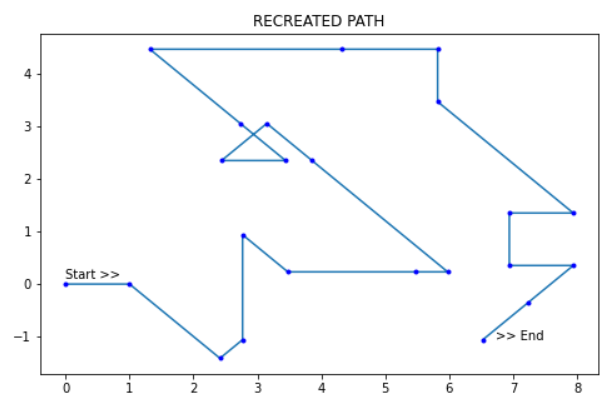

Si no has conseguido generar estos valores del ejercicio anterior puedes utilizar los siguientes valores:

    X= [0, 1.0, 2.4, 2.8, 2.8, 3.5, 5.5, 6.0, 3.9, 3.1, 2.4, 3.4, 2.7, 1.3, 4.3, 5.8, 5.8, 7.9, 6.9, 6.9, 7.9, 7.2, 6.5]
    Y= [0, 0, -1.4, -1.1, 0.9, 0.2, 0.2, 0.2, 2.4, 3.1, 2.4, 2.4, 3.1, 4.5, 4.5, 4.5, 3.5, 1.4, 1.4, 0.4, 0.4, -0.4, -1.1]

Es importante que tu visualización se parezca lo máximo posible a la imagen proporcionada como ejemplo

### Solución.

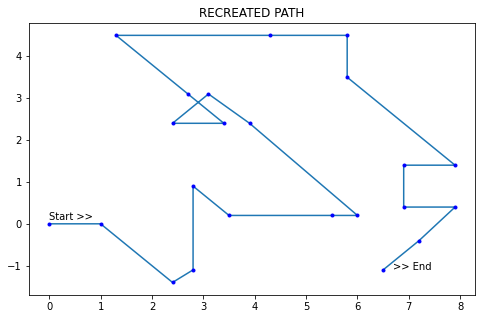

In [23]:
import matplotlib.pyplot as plt

X= [0, 1.0, 2.4, 2.8, 2.8, 3.5, 5.5, 6.0, 3.9, 3.1, 2.4, 3.4, 2.7, 1.3, 4.3, 5.8, 5.8, 7.9, 6.9, 6.9, 7.9, 7.2, 6.5]
Y= [0, 0, -1.4, -1.1, 0.9, 0.2, 0.2, 0.2, 2.4, 3.1, 2.4, 2.4, 3.1, 4.5, 4.5, 4.5, 3.5, 1.4, 1.4, 0.4, 0.4, -0.4, -1.1]

plt.figure(figsize=(8,5))
plt.plot(X,Y)
plt.plot(X,Y,".b")
plt.text(X[0],Y[0]+0.1, r'Start >>')
plt.text(X[-1]+0.2,Y[-1], r'>> End')
plt.title("RECREATED PATH")
plt.show()